<a href="https://colab.research.google.com/github/davideochoa/BackEnd/blob/main/A2_1_CasoPractico_BankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A2.1 Caso Práctico – Aprendizaje Supervisado  
## Maestría en Inteligencia Artificial

**Dataset:** BankChurners2.csv  
**Objetivo de regresión:** `Credit_Limit`  
**Objetivo de clasificación:** `Attrition_Flag`

En este notebook se desarrollan modelos de **regresión** y **clasificación** aplicando técnicas de aprendizaje supervisado.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

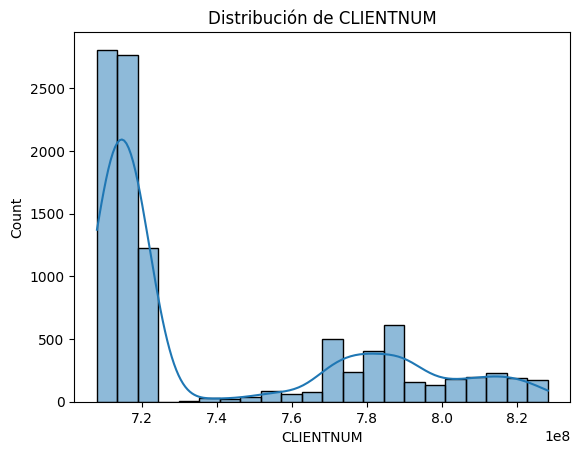

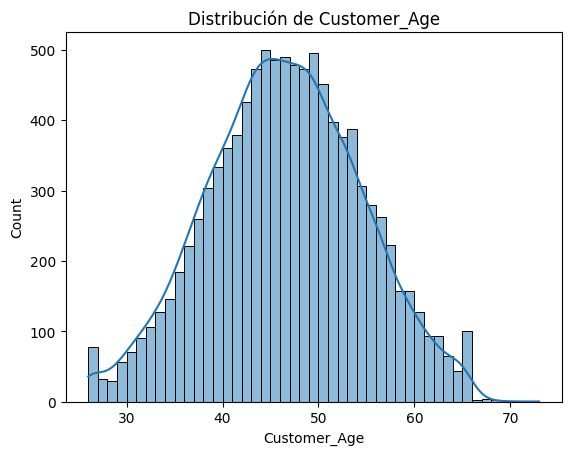

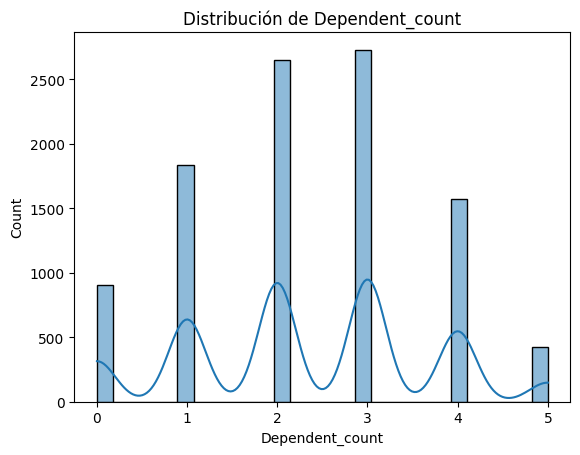

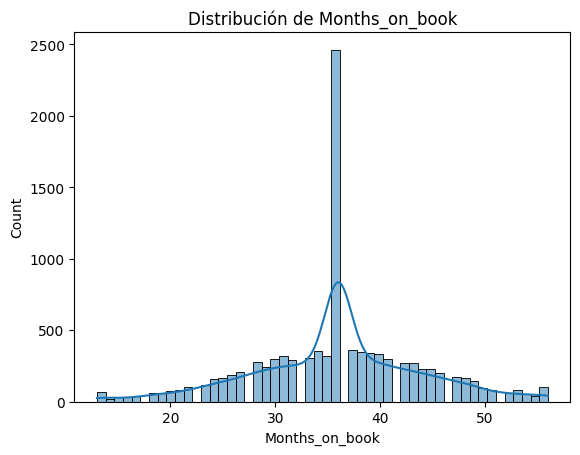

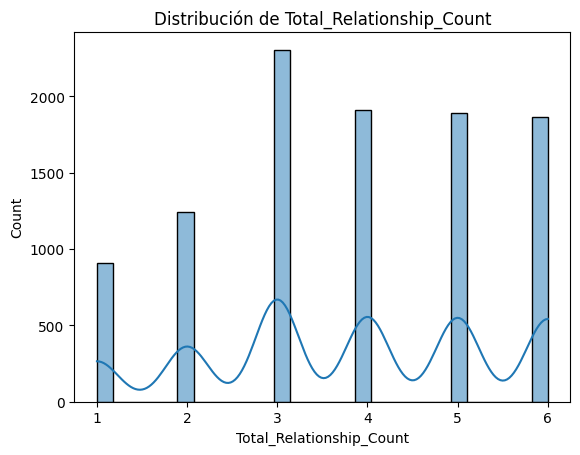

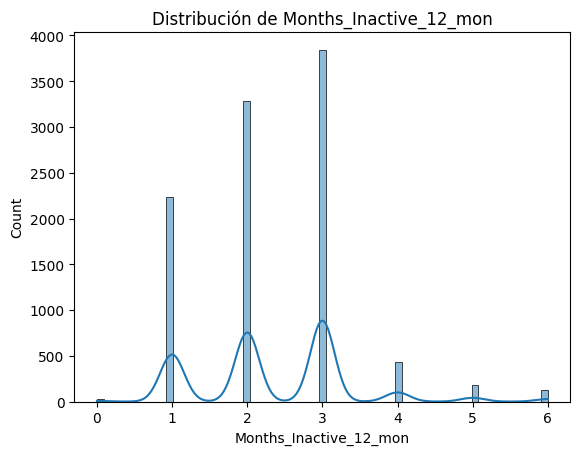

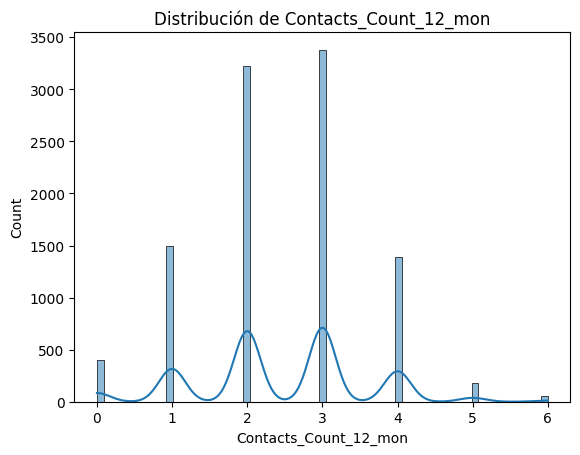

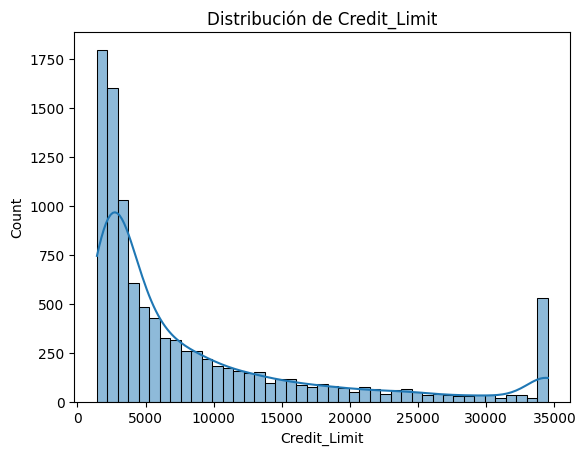

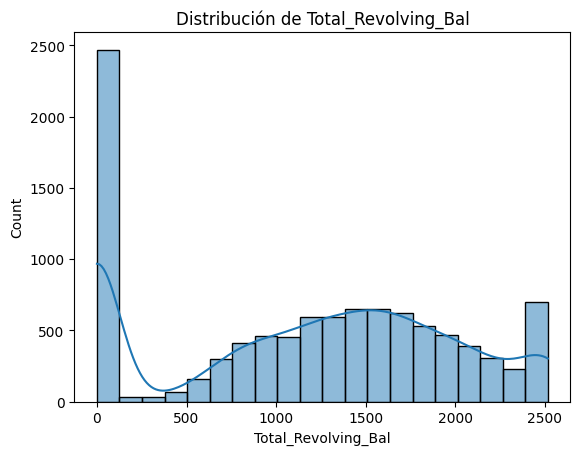

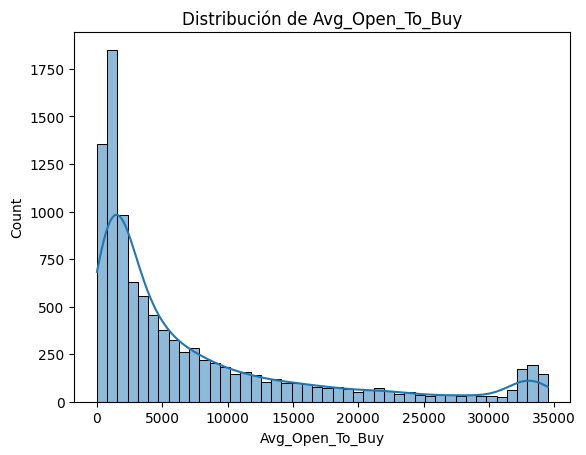

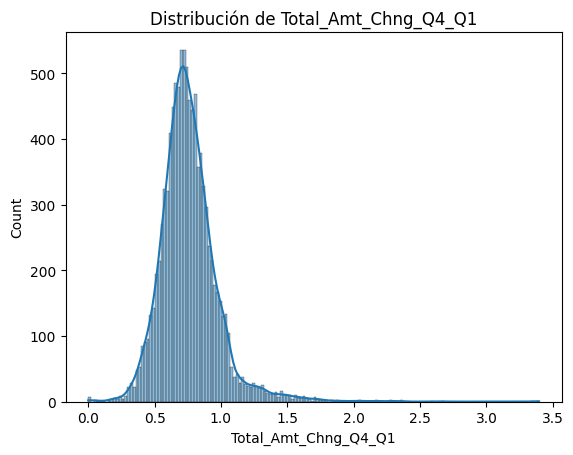

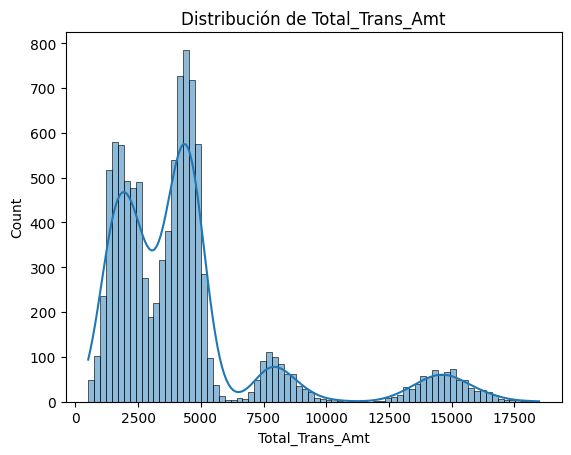

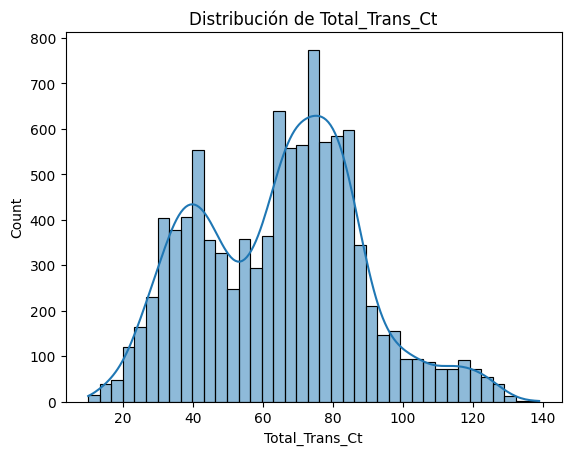

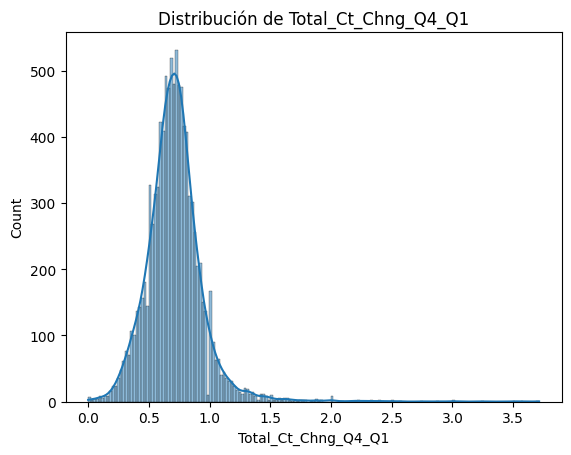

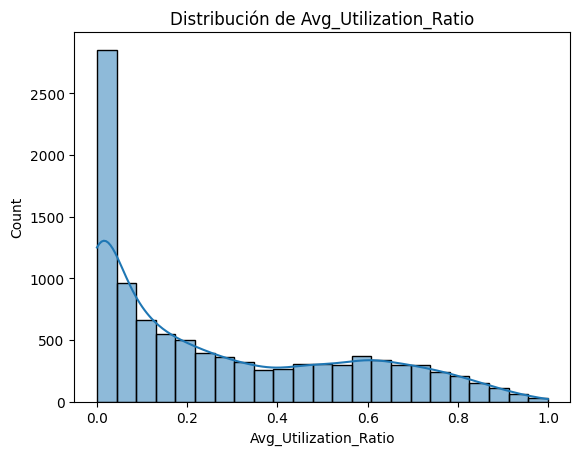

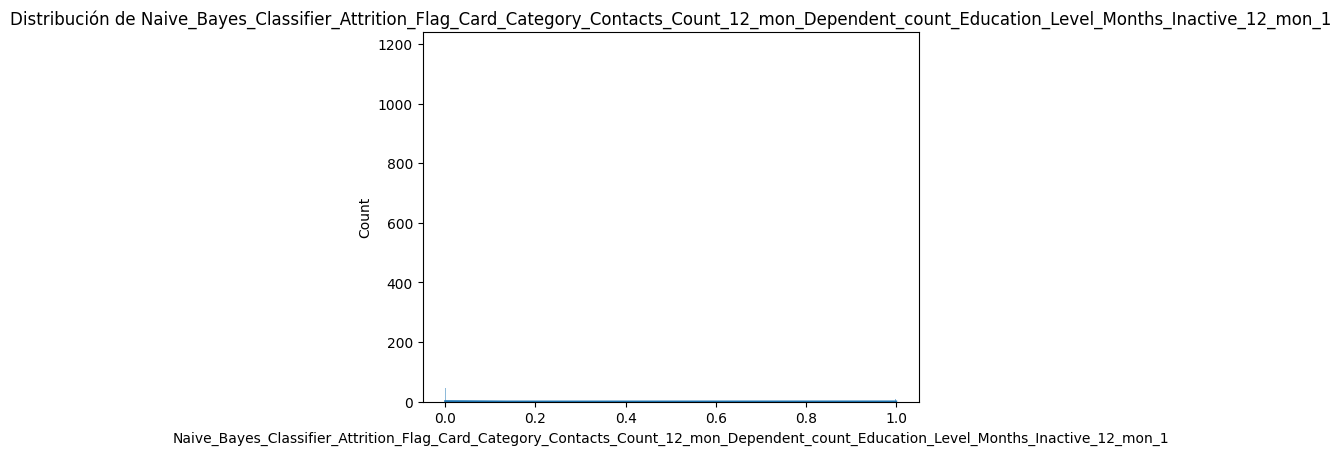

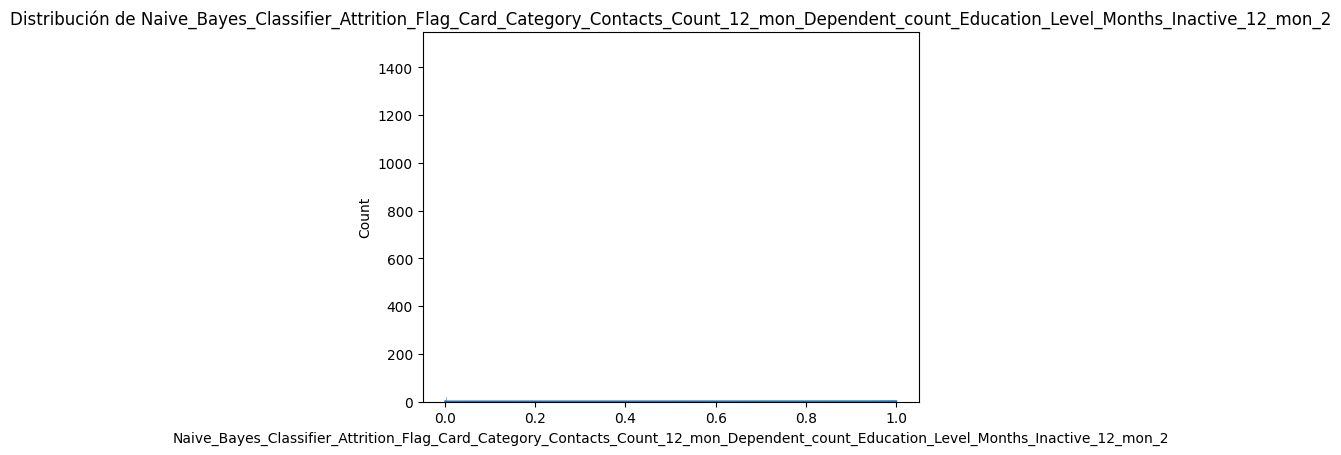

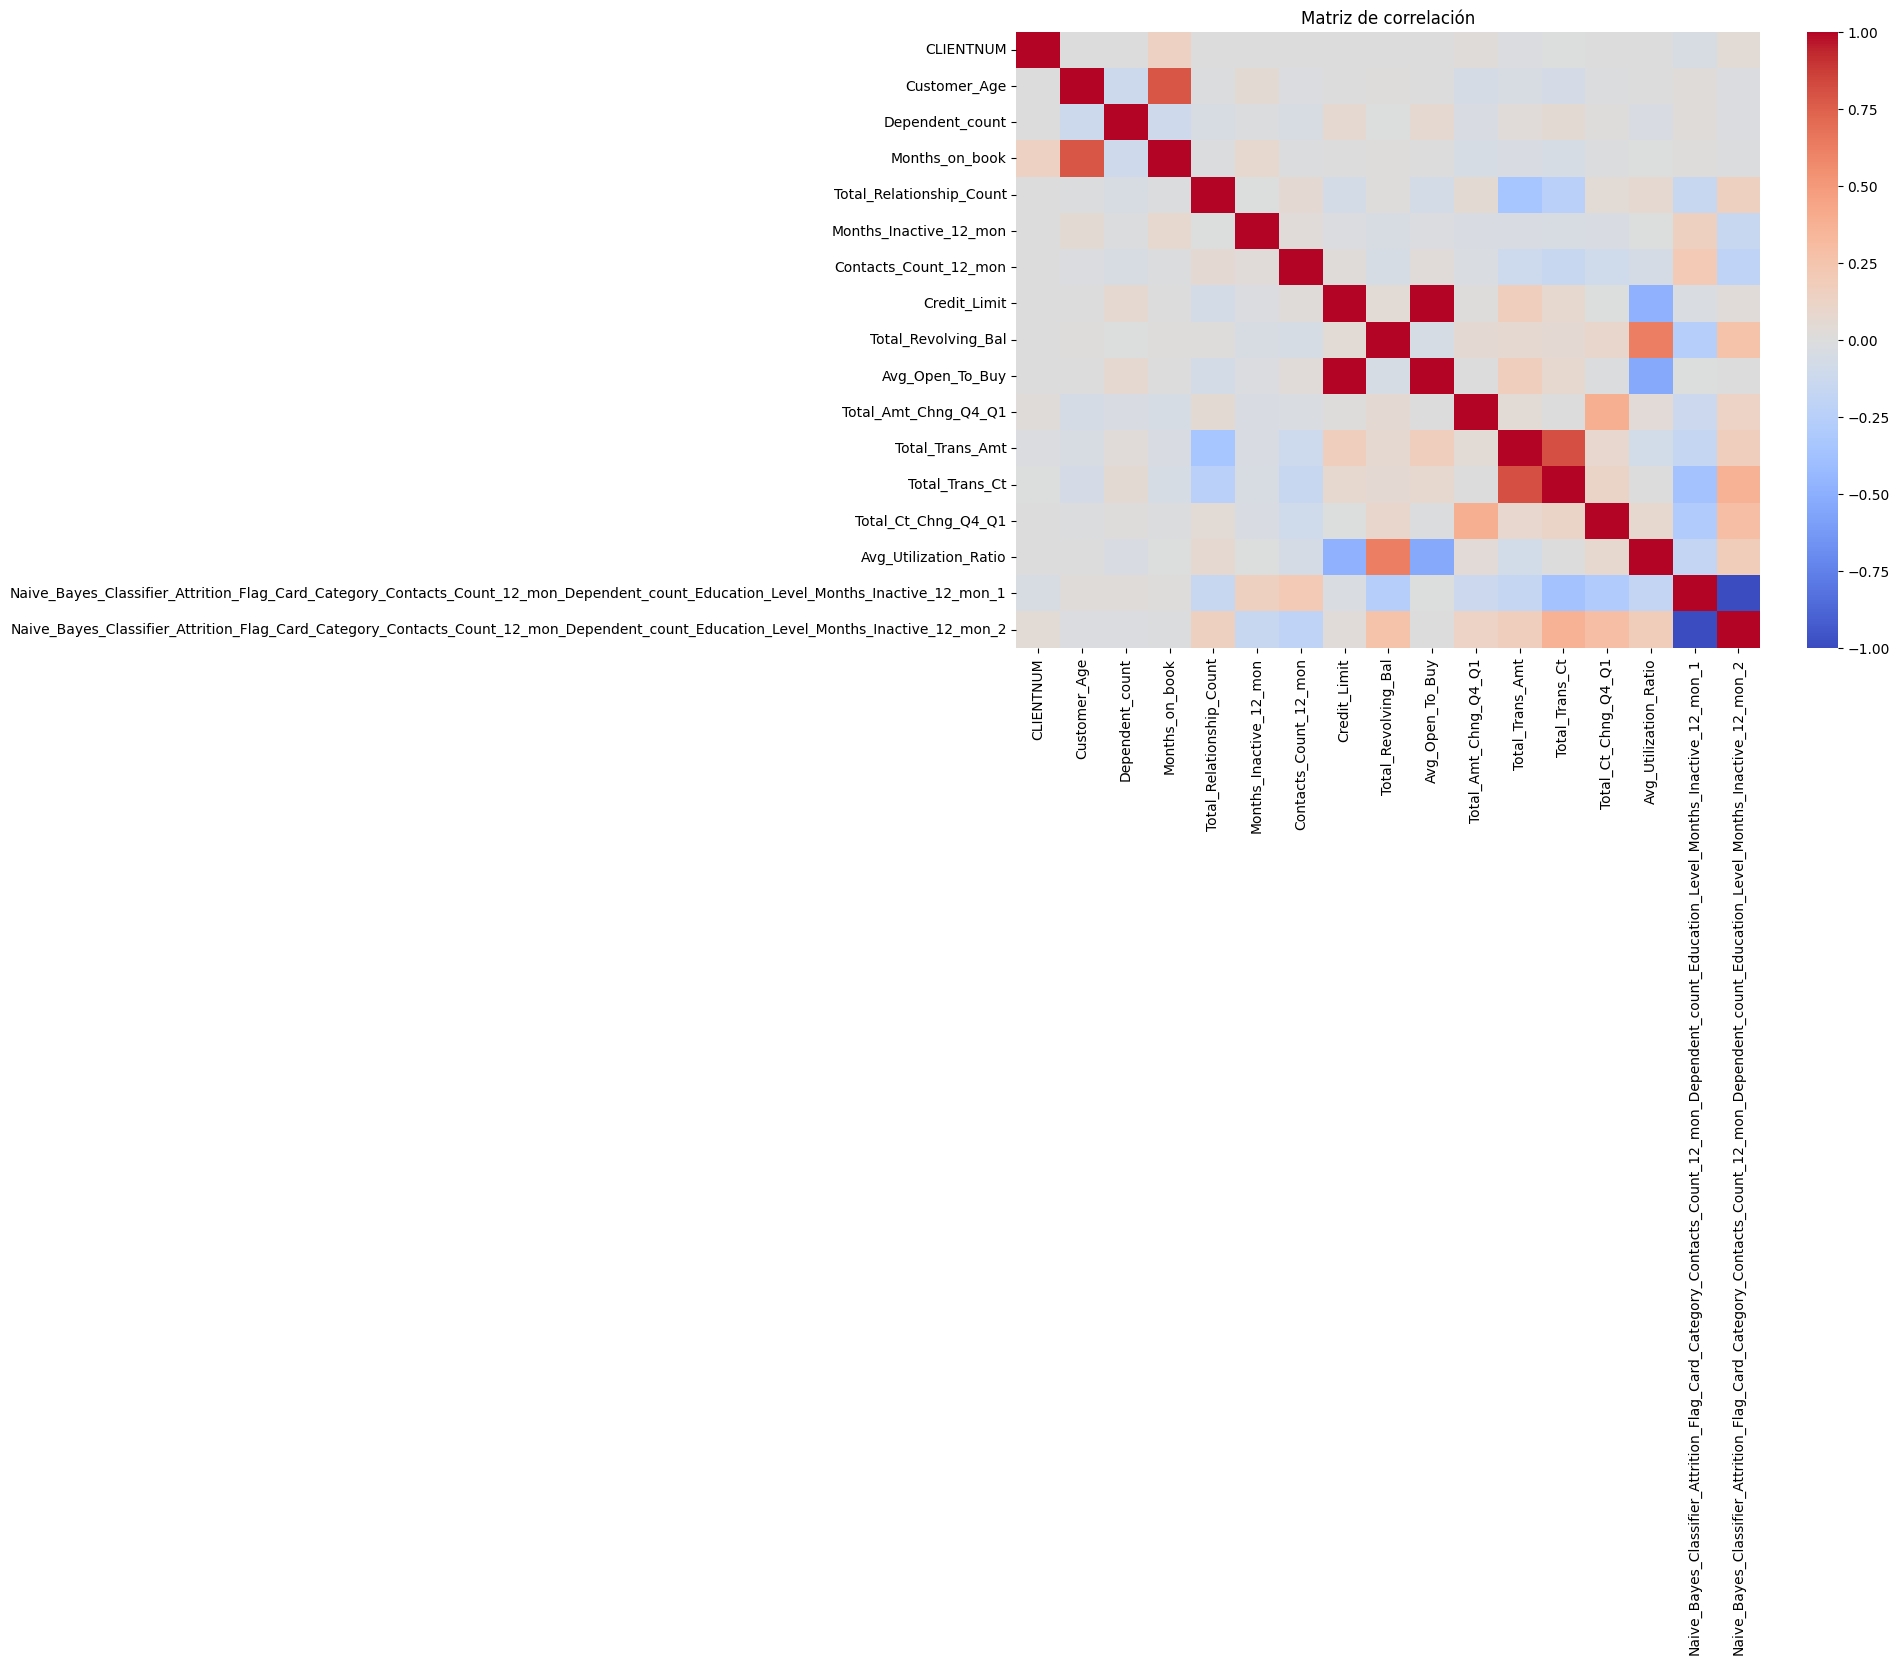

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar dataset
df = pd.read_csv('/content/drive/MyDrive/MaestríaIA/03_Aprendizaje_Automático/recursos/BankChurners2.csv')
df.head()

# Información general
df.info()

# Valores nulos
df.isnull().sum()

# Descripción de variables numéricas
df.describe()

# Visualizar distribuciones
num_vars = df.select_dtypes(include=np.number).columns
for col in num_vars:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Visualizar correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [5]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

# --- Preprocesamiento: convertir categorías a numéricas ---
df_class = df.copy()
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df_class[col] = le.fit_transform(df[col])

# Dividir variables para regresión
X_reg = df_class.drop(['Credit_Limit'], axis=1)
y_reg = df_class['Credit_Limit']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f'--- {name} ---')
    print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}
')


SyntaxError: unterminated f-string literal (detected at line 31) (ipython-input-3980096687.py, line 31)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Preparar datos para clasificación ---
X_cls = df_class.drop(['Attrition_Flag'], axis=1)
y_cls = df_class['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

models_cls = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models_cls.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'===== {name} =====')
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))
    print(f'Accuracy: {accuracy_score(y_test, preds):.3f}
')

# Importancia de características con Random Forest
rf = models_cls['Random Forest']
importances = pd.Series(rf.feature_importances_, index=X_cls.columns).sort_values(ascending=False)[:10]
importances.plot(kind='barh', title='Top 10 Características más importantes')
plt.show()


## Interpretación y Conclusiones

- **Regresión:** Analiza qué variables tienen mayor relación con `Credit_Limit`. Examina si los modelos Ridge y Lasso mejoran el rendimiento al controlar el sobreajuste.
- **Clasificación:** Evalúa el desempeño de cada modelo y la importancia de las variables. Reflexiona sobre por qué ciertas características influyen más en la predicción.
- **Comparación:** Comenta las diferencias entre regresión y clasificación, y qué implicaciones tienen en problemas reales de negocio.

